# SCT data

Script that plots the instrinsic noise, measured by electron count (ENC) of excess charge in channels, against HV.

Calculates the ENC spectrum for the cosmic signal

Finds the gap between noise and signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import scipy
from scipy import constants as c
from scipy.signal import savgol_filter

import math

In [13]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.figsize'] = [14,7]
plt.rcParams.update({'font.size': 22})

## Noise Occupancy HV


Channels 1-1280 are labelled "Lo" whilst 1281- 2560 are labelled "Hi"

In [3]:
channels = (' 0 Lo ',' 1 Lo ',' 2 Lo ',' 3 Lo ',' 4 Lo ',' 5 Lo ',' 6 Lo ',' 7 Lo ',' 8 Lo ',' 9 Lo ',' 0 Hi ', ' 1 Hi ', ' 2 Hi ', ' 3 Hi ', ' 4 Hi ', ' 5 Hi ',' 6 Hi ',' 7 Hi ',' 8 Hi ',' 9 Hi ' )

In [4]:
#Loading Data for Noise Occupancy of every channel, with varying threshold at HV = 350V

NO_cube_350 = np.zeros((201,20,128))
for i in range(0,201):
    hitmap = np.zeros((20,128))
    f=open(r"C:\Users\Lucas\Documents\Work\Research project\cosmic scans\492_12\raw data\EventData_492_12_"+str(i+502)+".dat")
    for line in f:
        if line[3:9] in channels:
            chip_hit = list(line[9:137])
            chip_num=channels.index(line[3:9])
            hitmap[chip_num]=hitmap[chip_num]+np.array(chip_hit,int)
    
    NO_350 = hitmap/10000
    NO_cube_350[i]=NO_350

In [19]:
#Loading Data for Noise Occupancy of every channel, with varying threshold at HV = 150V

NO_cube_150 = np.zeros((201,20,128))
for i in range(0,201):
    hitmap = np.zeros((20,128))
    f=open(r"C:\Users\Lucas\Documents\Work\Research project\cosmic scans\492_13\raw data\EventData_492_13_"+str(i+703)+".dat")
    for line in f:
        if line[3:9] in channels:
            chip_hit = list(line[9:137])
            chip_num=channels.index(line[3:9])
            hitmap[chip_num]=hitmap[chip_num]+np.array(chip_hit,int)
    
    NO_150 = hitmap/10000
    NO_cube_150[i]=NO_150

In [21]:
#Calculating the Noise Occupancy averaged across all channels, with varying threshold at HV = 350V

NO_stream_avg_350 = np.average(NO_cube_350,2)
NO_avg_350= np.average(NO_stream_avg_350,1)

#Calculating the Noise Occupancy averaged across all channels, with varying threshold at HV = 150V

NO_stream_avg_150 = np.average(NO_cube_150,2)
NO_avg_150= np.average(NO_stream_avg_150,1)

Text(0.5, 1.0, 'Average Noise Occupancy vs Threshold at HV=-50V')

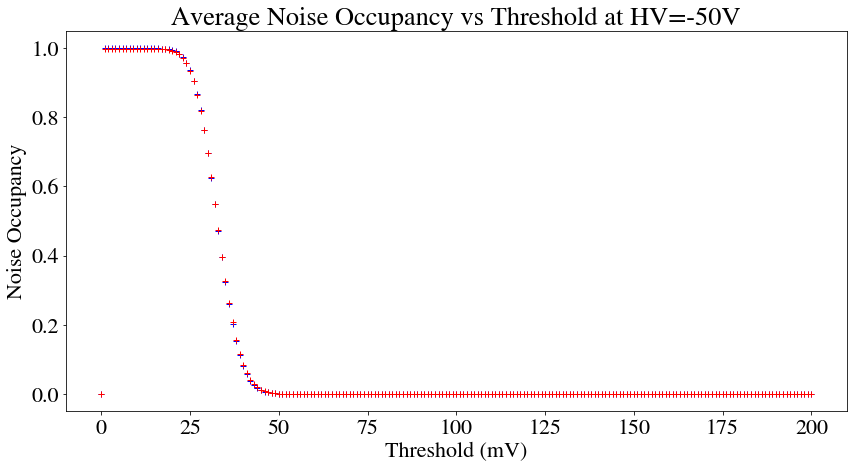

In [22]:


plt.plot(NO_avg_350,color='b',marker='+',ls='none', linewidth=0.5, mew=1)
plt.plot(NO_avg_150,color='r',marker='+',ls='none', linewidth=0.5, mew=1)

plt.xlabel("Threshold (mV)")
plt.ylabel("Noise Occupancy")
plt.title("Average Noise Occupancy vs Threshold at HV=-50V")
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Noise\NO_vs_Thr_50.jpeg',bbox_inches='tight');

Calculating the # of channels with NO > $10^{-5}$

In [23]:
Noisy_chan_350=np.sum((NO_cube_350>=0.00001),(1,2))

Noisy_chan_150=np.sum((NO_cube_150>=0.00001),(1,2))

Text(0.5, 1.0, '# Channels with NO > $10^{-5}$ vs Threshold at HV=-50V')

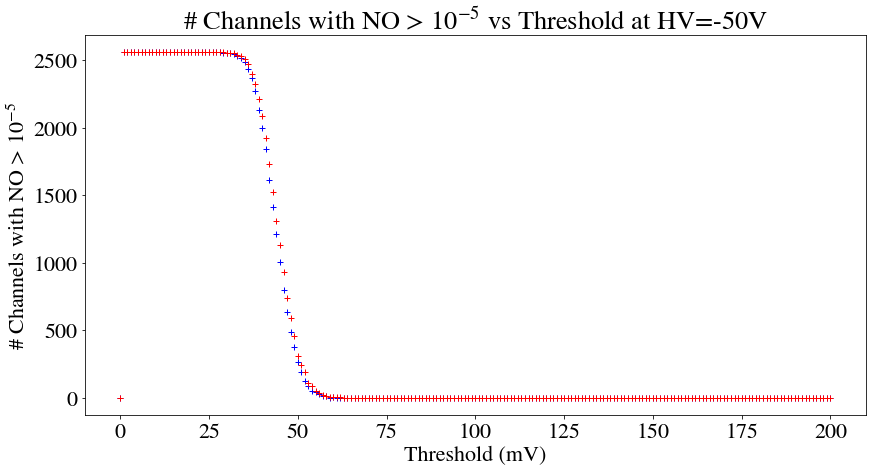

In [24]:
plt.plot(Noisy_chan_350,color='b',marker='+',ls='none', linewidth=0.5, mew=1)
plt.plot(Noisy_chan_150,color='r',marker='+',ls='none', linewidth=0.5, mew=1)


plt.xlabel("Threshold (mV)")
plt.ylabel("# Channels with NO > $10^{-5}$")
plt.title("# Channels with NO > $10^{-5}$ vs Threshold at HV=-50V")
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Noise\NO_chan_vs_Thr_50.jpeg',bbox_inches='tight');

In this case, a channel is left "unmasked" if its NO is less than $10^{-5}$

In [25]:
Unmasked_chan_350= 2560-Noisy_chan_350
Unmasked_chan_frac_350= Unmasked_chan_350/2560

Unmasked_chan_150= 2560-Noisy_chan_150
Unmasked_chan_frac_150= Unmasked_chan_150/2560

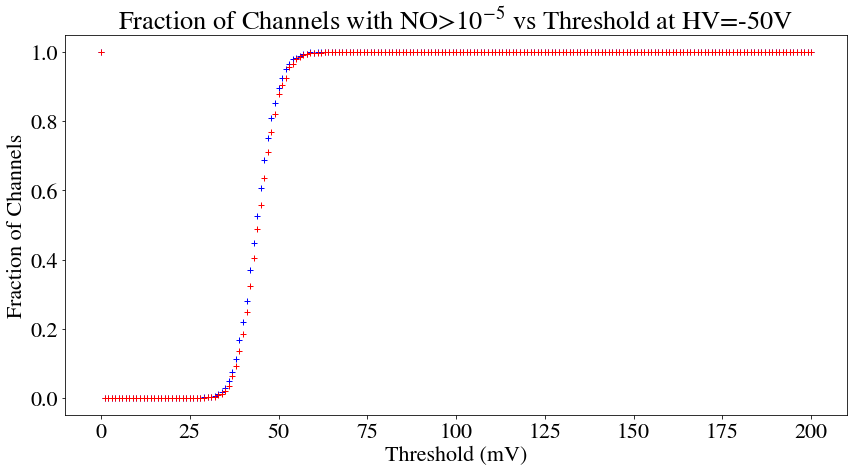

In [27]:
plt.plot(Unmasked_chan_frac_350,color='b',marker='+',ls='none', linewidth=0.5, mew=1)
plt.plot(Unmasked_chan_frac_150,color='r',marker='+',ls='none', linewidth=0.5, mew=1)

plt.xlabel("Threshold (mV)")
plt.ylabel("Fraction of Channels")
plt.title("Fraction of Channels with NO>$10^{-5}$ vs Threshold at HV=-50V");
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Noise\NO_Frac_vs_Thr_50.jpeg',bbox_inches='tight');

## Noise with varying HV 

In [28]:
#noise_cube contains noise for all channels
noise_cube = np.zeros((21,2560,5))

#noise_HV_list contains noise for all good channels
noise_HV_list=[]

for i in range(0,21):
    #Loading data
    noise_HV_const = np.loadtxt(r"C:\Users\Lucas\Documents\Work\Research project\Data\3PG varying HV\CAM_LS_02_X_RC_475_"+str(6+3*i)+".txt",usecols=(0,1,2,3,4))
    
    #dead_chan contains channels which are "dead" or "inefficient"
    dead_chan=np.where(noise_HV_const[:,1]==1 )[0]
    dead_chan=np.append(dead_chan,(np.where(noise_HV_const[:,1]==4)[0]))
    #cutting dead channels out
    noise_HV_cut=np.delete(noise_HV_const, dead_chan,0)
    noise_cube[i]=noise_HV_const
    noise_HV_list.append(noise_HV_cut)
    

In [29]:
#Calculating sigma in noise
noise_HV_sigma= np.std(noise_cube[:,:,4], axis=1)

In [30]:
#Calculating sigma in noise, with noisy channels cut
noise_HV_cut_sigma=np.zeros(21)
for i in range(0,21):
    noise_HV_cut_sigma[i]=np.std(noise_HV_list[i][:,4])

In [31]:
#Calculating mean noise for each HV
noise_HV_mean=np.mean(noise_cube[:,:,4], axis=1)

In [32]:
#Calculating mean noise for each HV, with noisy channels cut
noise_HV_cut_mean=np.zeros(21)
for i in range(0,21):
    noise_HV_cut_mean[i]=np.mean(noise_HV_list[i][:,4])

In [33]:
HV=np.arange(-350,-140,10)

Plotting Noise vs High Voltage (all channels)

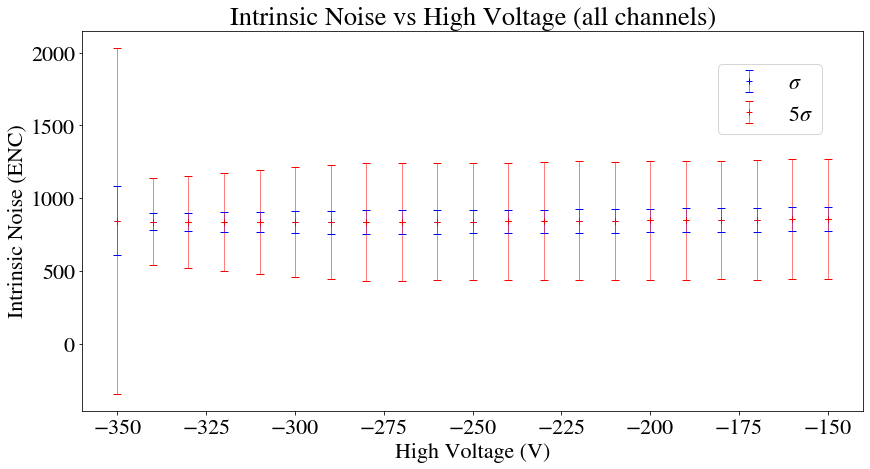

In [34]:
plt.errorbar(HV,noise_HV_mean,yerr=noise_HV_sigma,color='b',marker='+',ls='none', linewidth=0.5, mew=1,capsize=4, label="$\\sigma$")
plt.errorbar(HV,noise_HV_mean,yerr=5*noise_HV_sigma,color='r',marker='+',ls='none', linewidth=0.5, mew=1,capsize=4, label="$5\\sigma$")
plt.xlabel("High Voltage (V)")
plt.ylabel("Intrinsic Noise (ENC)")
plt.title("Intrinsic Noise vs High Voltage (all channels)")
plt.legend(loc="lower left", bbox_to_anchor=(0.8, 0.7))
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Noise\Noise_vs_HV(all).jpeg',bbox_inches='tight');

Plotting Noise vs High Voltage (good channels)

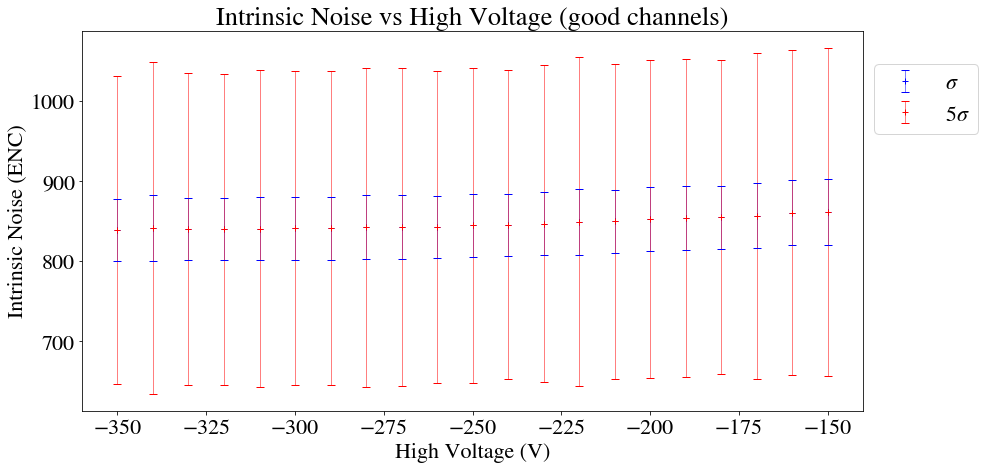

In [35]:
plt.errorbar(HV,noise_HV_cut_mean,yerr=noise_HV_cut_sigma,color='b',marker='+',ls='none', linewidth=0.5, mew=1,capsize=4,label="$\\sigma$")
plt.errorbar(HV,noise_HV_cut_mean,yerr=5*noise_HV_cut_sigma,color='r',marker='+',ls='none', linewidth=0.5, mew=1,capsize=4,label="$5\\sigma$")
plt.xlabel("High Voltage (V)")
plt.ylabel("Intrinsic Noise (ENC)")
plt.title("Intrinsic Noise vs High Voltage (good channels)")
plt.legend(loc="lower left", bbox_to_anchor=(1, 0.7))
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Noise\Noise_vs_HV(good).jpeg',bbox_inches='tight');

Plotting the frequency of varying levels of noise

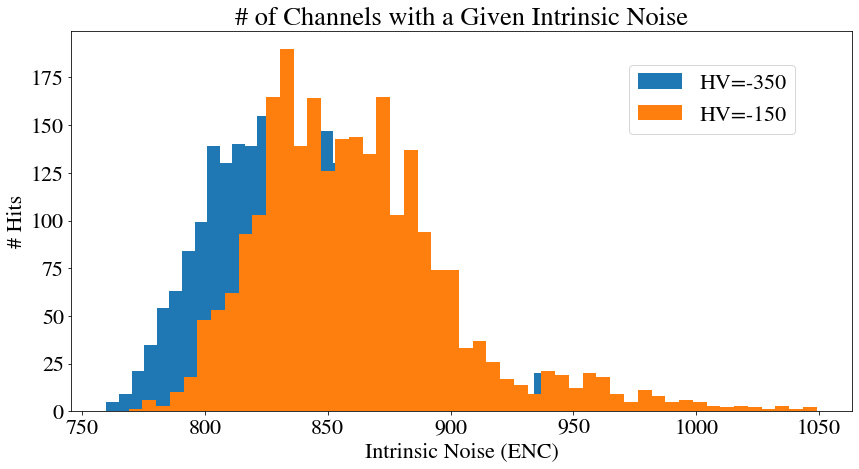

In [36]:
plt.hist(noise_HV_list[0][:,4],bins=50,label="HV=-350")
plt.hist(noise_HV_list[20][:,4],bins=50,label="HV=-150")
plt.xlabel("Intrinsic Noise (ENC)")
plt.ylabel("# Hits")
plt.title("# of Channels with a Given Intrinsic Noise")
plt.legend(loc="lower left", bbox_to_anchor=(0.7, 0.7))
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Noise\Hits_vs_ENC.jpeg',bbox_inches='tight');

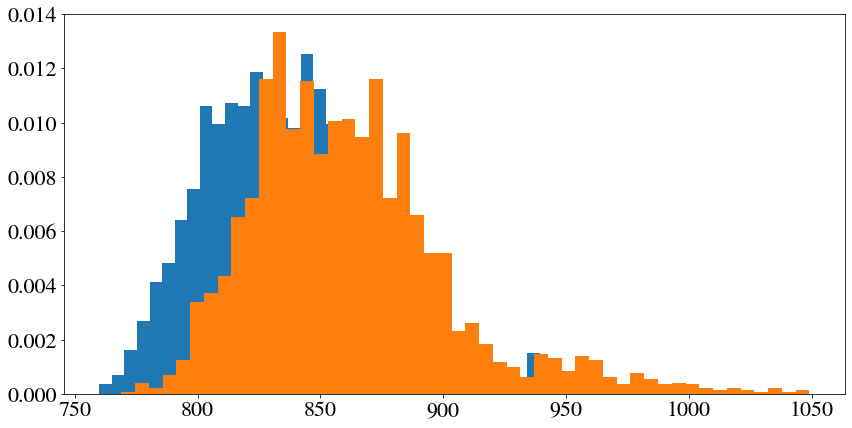

In [37]:
#Putting histogram data into variable
noise_350=plt.hist(noise_HV_list[0][:,4],bins=50,label="HV=-350",density=True)
noise_150=plt.hist(noise_HV_list[20][:,4],bins=50,label="HV=-150",density=True)

In [38]:
smooth_350=savgol_filter(noise_350[0], 25, 3)

In [43]:
smooth_350=savgol_filter(noise_350[0], 25, 3)

In [39]:
smooth_150=savgol_filter(noise_150[0], 25, 3)

Plotting probability density for Intrinic Noise

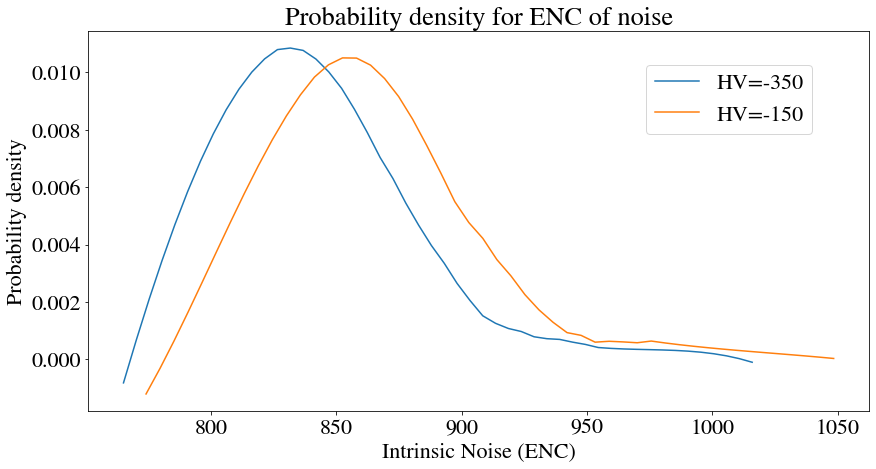

In [40]:
plt.plot(noise_350[1][:-1]+5.06,smooth_350,label="HV=-350")
plt.plot(noise_150[1][:-1]+5.06,smooth_150,label="HV=-150")
plt.xlabel("Intrinsic Noise (ENC)")
plt.ylabel("Probability density")
plt.title("Probability density for ENC of noise")
plt.legend(loc="lower left", bbox_to_anchor=(0.7, 0.7))
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Noise\Prob_vs_ENC.jpeg',bbox_inches='tight');

## Cosmics Data

We take a threshold scan of the voltage of signals from cosmic muons

In [5]:
#Array of threshold used
thr_arr = np.arange(55,181)
thr_no=len(thr_arr)

In [6]:
#Cube that contains all the cosmic hits in each channel at each threshold
hitmap_cube = np.zeros((thr_no,20,128))

for i in range(0,thr_no):
    hitmap = np.zeros((20,128))
    if i<5:
        #55-59 mV    
        f=open(r"C:\Users\Lucas\Documents\Work\Research project\cosmic scans\480_7\raw data\EventData_480_7_"+str(i+165)+".dat")
    
    elif 5<=i<10:
        #60-64 mV
        f=open(r"C:\Users\Lucas\Documents\Work\Research project\cosmic scans\492_11\raw data\EventData_492_11_"+str(i+492)+".dat")
    
    elif 10<=i<15:
        #65-69 mV
        f=open(r"C:\Users\Lucas\Documents\Work\Research project\cosmic scans\480_5\raw data\EventData_480_5_"+str(i+90)+".dat")
    
    elif 15<=i<66:
        #70-120
        f=open(r"C:\Users\Lucas\Documents\Work\Research project\cosmic scans\447_6\raw data\EventData_447_6_"+str(i+117)+".dat")
    
    else:
        #121-180
        f=open(r"C:\Users\Lucas\Documents\Work\Research project\cosmic scans\480_6\raw data\EventData_480_6_"+str(i+39)+".dat")

    for line in f:
        if line[3:9] in channels:
            chip_hit = list(line[9:137])
            chip_num=channels.index(line[3:9])
            hitmap[chip_num]=hitmap[chip_num]+np.array(chip_hit,int)
            
        
    
    
    hitmap_cube[i]=hitmap

In [7]:
#Total number of hits at each threshold for all channels
hits=np.sum(hitmap_cube,(1,2))

In [8]:
#Here we cut channels that are labeled "dead" or "inefficient" 

hits_arr=np.reshape(hitmap_cube,(thr_no,2560))

#This is only considering HV=-359
hits_arr_cut = np.delete(hits_arr,[1405,1406,1407,2557,2559], axis=1)
hits_cut = np.sum(hits_arr_cut,axis=1)

In [9]:
#Creating an array of all the triggers sent at each threshold
triggers=np.full((thr_no,),1000)
triggers[0:15]=500
triggers[24]=647
triggers[66:]=500

Plotting the total number of hits from a cosmic signal as a function of threshold

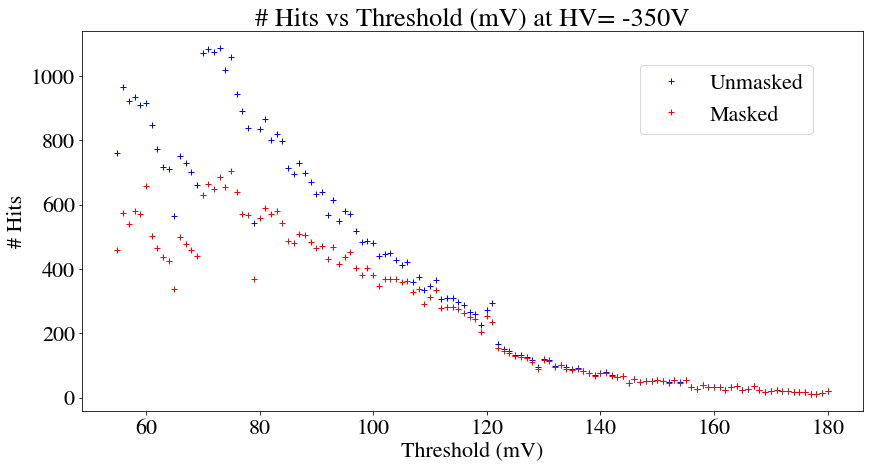

In [14]:
plt.plot(thr_arr,hits,color='b',marker='+',ls='none', linewidth=0.5, mew=1, label='Unmasked')
plt.plot(thr_arr,hits_cut,color='r',marker='+',ls='none', linewidth=0.5, mew=1, label='Masked')
plt.xlabel("Threshold (mV)")
plt.ylabel("# Hits")
plt.title("# Hits vs Threshold (mV) at HV= -350V")
plt.legend(loc="lower left", bbox_to_anchor=(0.7, 0.7))
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Cosmics\Hits_vs_Thr_350.jpeg',bbox_inches='tight');

In [15]:
#Calculating hits per trigger sent
hitpertrig=hits/triggers
hitpertrig_cut=hits_cut/triggers

Now normalize data to number of triggers sent

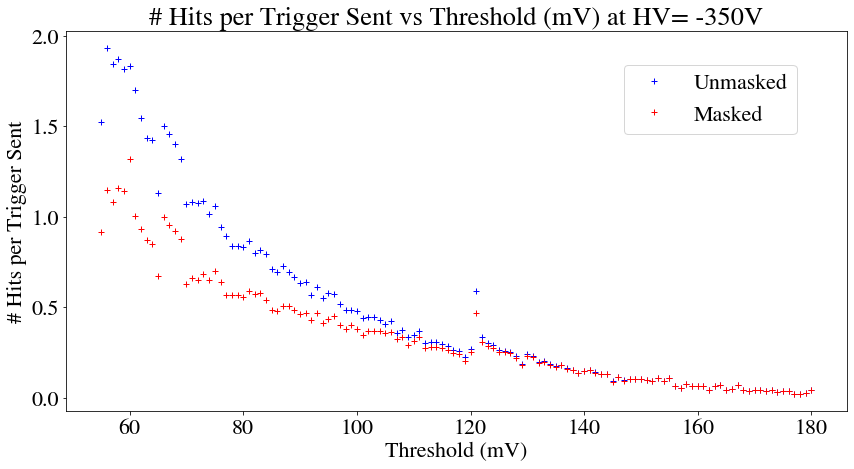

In [16]:
plt.plot(thr_arr, hitpertrig,color='b',marker='+',ls='none', linewidth=0.5, mew=1,label='Unmasked')
plt.plot(thr_arr, hitpertrig_cut,color='r',marker='+',ls='none', linewidth=0.5, mew=1, label='Masked')
plt.xlabel("Threshold (mV)")
plt.ylabel("# Hits per Trigger Sent")
plt.title("# Hits per Trigger Sent vs Threshold (mV) at HV= -350V")
plt.legend(loc="lower left", bbox_to_anchor=(0.7, 0.7))
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Cosmics\HitsperTrig_vs_Thr_350.jpeg',bbox_inches='tight');

In [41]:
#Creating an array of the gain of channels at -350V
gain_350=noise_HV_list[0][:,2]

Histogram of the gain of channels

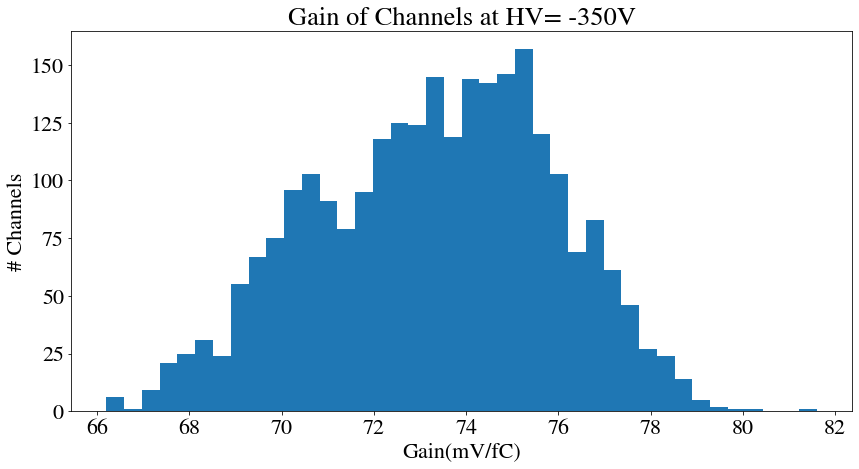

In [42]:
plt.hist(gain_350,bins=40)
plt.xlabel("Gain(mV/fC)")
plt.ylabel("# Channels")
plt.title("Gain of Channels at HV= -350V")
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Cosmics\Chan_vs_gain_350.jpeg',bbox_inches='tight');

Using the gain for each channel and the threshold at which we see a hit, we can calculate the charge spectrum of the cosmic signal

In [43]:
vthr_arr=np.zeros((thr_no,2555))

for i in range(thr_no):
    vthr_arr[i,:]=np.full(np.shape(vthr_arr[i,:]),thr_arr[i])

In [44]:
enc_arr= 6250*(vthr_arr/gain_350)
enc_arr= np.round(enc_arr)
enc_vec=np.reshape(enc_arr,(np.size(enc_arr),))
enc_vec=enc_vec.astype(int)

In [45]:
hits_vec=np.reshape(hits_arr_cut,(np.size(hits_arr_cut),))
hits_vec=hits_vec.astype(int)

cosmic_dat= np.repeat(enc_vec, hits_vec)

In [46]:
hits_arr_cut_trig= hits_arr_cut/triggers.reshape(-1,1)
hits_scale= hits_arr_cut_trig*647*1000
hits_vec_scale=np.reshape(hits_scale,(np.size(hits_scale),))
hits_vec_scale=hits_vec_scale.astype(int)

cosmic_dat_scale= np.repeat(enc_vec, hits_vec_scale)

Plotting histogram of Normalized hits as a function of charge threshold

Text(0.5, 1.0, '# of Hits per Trigger for a Cosmic Signal vs ENC Threshold at HV= -350V')

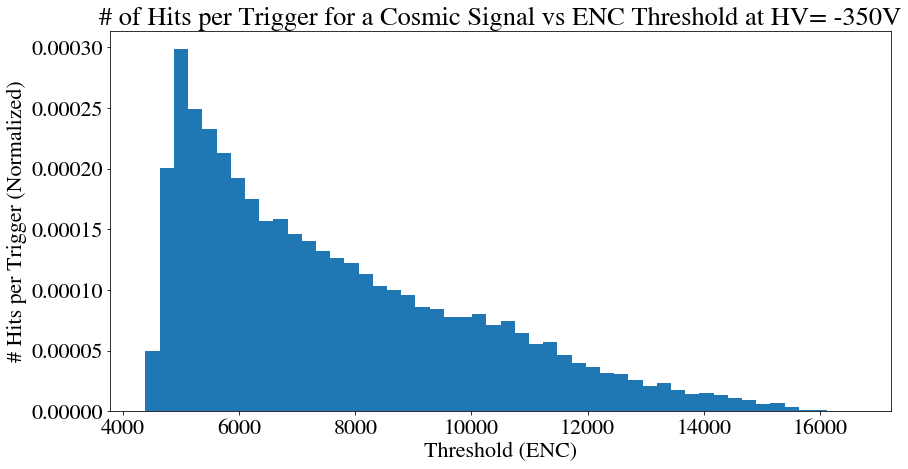

In [47]:
cosmic_thr=plt.hist(cosmic_dat_scale,bins=50, density=True)
plt.xlabel("Threshold (ENC)")
plt.ylabel("# Hits per Trigger (Normalized)")
plt.title("# of Hits per Trigger for a Cosmic Signal vs ENC Threshold at HV= -350V")
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Cosmics\HitsperTrig_vs_ENC_350.jpeg',bbox_inches='tight');

In [62]:
smooth_thr = savgol_filter(cosmic_thr[0], 25,7)

The gradient of the Threshold scan gives us the charge spectrum of the signal

In [90]:
grad=np.gradient(smooth_thr,cosmic_thr[1][:-1])

Plotting probability density of the charge in signals of intrinsic noise and cosmic muons

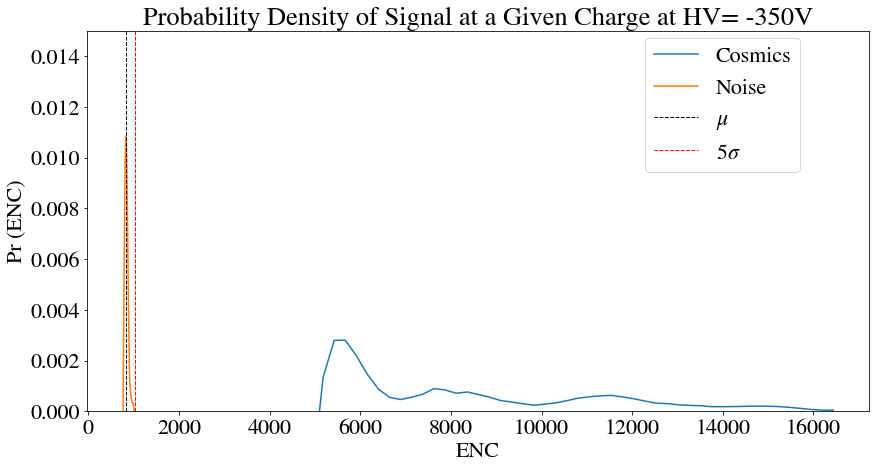

In [106]:
plt.plot(cosmic_thr[1][:-1]+61.83,-grad*(1/0.0002)*5, label='Cosmics')
plt.plot(noise_350[1][:-1]+5.06,smooth_350, label='Noise')

plt.axvline(noise_HV_cut_mean[0], color='k', ls='--', lw=1, label='$\\mu$')
plt.axvline(noise_HV_cut_mean[0]+5*noise_HV_cut_sigma[0], color='r', ls='--', lw=1, label='5$\\sigma$')

plt.ylim((0,0.015))

plt.xlabel("ENC")
plt.ylabel("Pr (ENC)")
plt.title("Probability Density of Signal at a Given Charge at HV= -350V")
plt.legend(loc="lower left", bbox_to_anchor=(0.7, 0.6))
#plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Cosmics\PrDen_vs_ENC_350.jpeg',bbox_inches='tight');

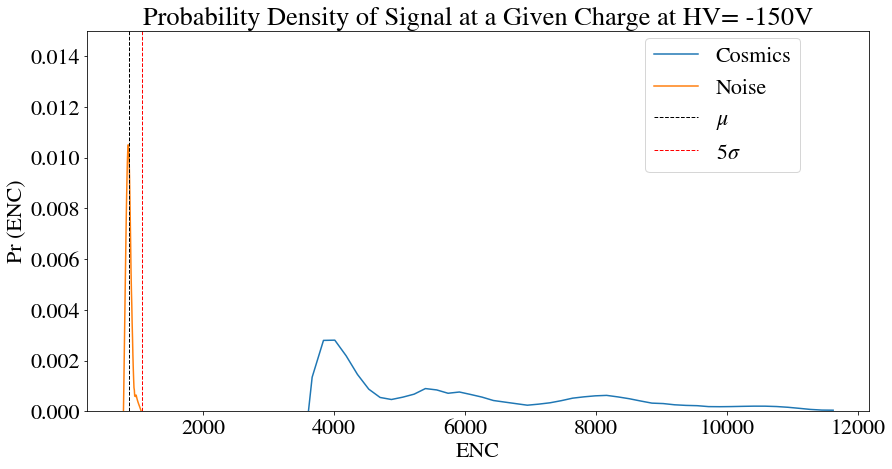

In [108]:
plt.plot((cosmic_thr[1][:-1]+61.83)/np.sqrt(2),-grad*(1/0.0002)*5, label='Cosmics')
plt.plot(noise_150[1][:-1]+5.06,smooth_150, label='Noise')

plt.axvline(noise_HV_cut_mean[20], color='k', ls='--', label='$\\mu$',lw=1)
plt.axvline(noise_HV_cut_mean[20]+5*noise_HV_cut_sigma[20], color='r', ls='--', lw=1, label='5$\\sigma$')

plt.ylim((0,0.015))

plt.xlabel("ENC")
plt.ylabel("Pr (ENC)")
plt.title("Probability Density of Signal at a Given Charge at HV= -150V")
plt.legend(loc="lower left", bbox_to_anchor=(0.7, 0.6))
plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Cosmics\PrDen_vs_ENC_150.jpeg',bbox_inches='tight');

Calculating the gap between noise + 5$\sigma$ and the start of the muon signal

In [97]:
for i in range(0,len(grad)):    
    if -grad[i] >0:
    
        print(i)
        break
        
inter=grad[i-1]/(grad[i-1]-grad[i])
zero_p_350=(cosmic_thr[1][i-1]+61.83) + inter*(cosmic_thr[1][i]-cosmic_thr[1][i-1])
q_scale=np.full((21,),1.0)
q_scale[6:]=np.sqrt(np.arange(290,140,-10)/300)
zero_p= q_scale*zero_p_350

3


In [98]:
space= zero_p-(noise_HV_cut_mean+5*noise_HV_cut_sigma)
print(space)

[4069.70412867 4052.49694994 4066.77543134 4067.25596463 4062.79116465
 4063.88758392 3978.74521894 3886.76835664 3798.29249816 3711.54691004
 3615.53297293 3523.67344578 3422.38820541 3313.37261262 3221.69682298
 3113.98819504 3007.92538865 2900.88270314 2780.14124908 2662.5240875
 2541.11564939]


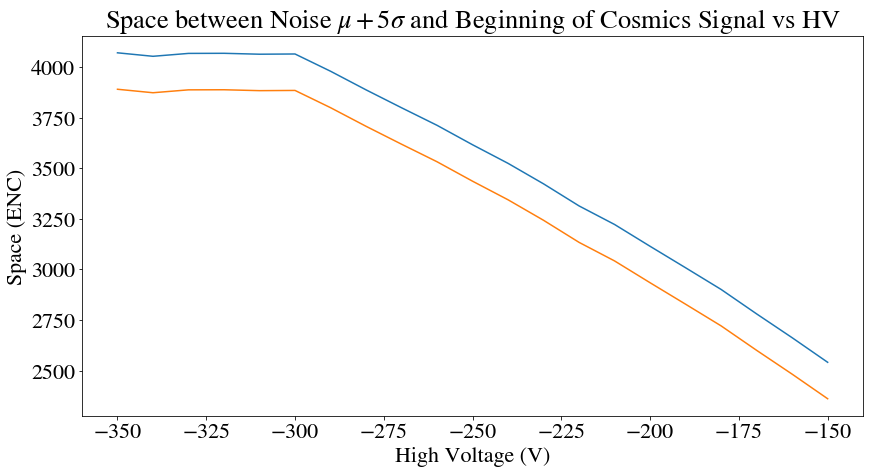

In [99]:
plt.plot(HV,space)
plt.plot(HV,space-180)
plt.xlabel("High Voltage (V)")
plt.ylabel("Space (ENC)")
plt.title("Space between Noise $\\mu + 5\\sigma$ and Beginning of Cosmics Signal vs HV")
plt.savefig(r'C:\Users\Lucas\Documents\Work\Research project\Figures\Cosmics\Space_vs_HV.jpeg',bbox_inches='tight');